In [1]:
import re
import datetime
import pathlib
import polars as pl # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

In [2]:
VERSION = datetime.datetime.now().strftime("%y%m%d")
print(f"Execute Date: {VERSION}")

Execute Date: 251212


## Parameters for papermill

In [3]:
foldseek_result_tsv = pathlib.Path("../test/oryza_sativa_test_202509/foldseek_os_random_9606.tsv")
query_uniprot_idmapping_tsv = pathlib.Path("../test/oryza_sativa_test_202509/rice_random_gene_idmapping_all.tsv")
water_result_dir_path = pathlib.Path("../test/oryza_sativa_test_202509/result_water")
needle_result_dir_path = pathlib.Path("../test/oryza_sativa_test_202509/result_needle")
query_gene_list_tsv_path = pathlib.Path("../test/oryza_sativa_test_202509/oryza_sativa_random_gene_list.tsv")
togoid_convert_tsv_path = pathlib.Path("../test/oryza_sativa_test_202509/foldseek_hit_species_togoid_convert.tsv")

In [4]:
# Parameters
foldseek_result_tsv = "/tmp/5xecez34/stg0b8e7ebf-b1de-4488-b896-4a64a7acb7be/foldseek_os_100genes_9606_stringent.tsv"
query_uniprot_idmapping_tsv = "/tmp/5xecez34/stg2d5343a3-74c7-480a-a3b2-c702c6fc6925/os_100_genes_idmapping_all.tsv"
water_result_dir_path = "/tmp/5xecez34/stgb5915dee-f633-4531-af6c-bf9eee54d43e/result_water"
needle_result_dir_path = "/tmp/5xecez34/stgadb4ec15-f9ce-4304-8e13-29ea40eb2d34/result_needle"
query_gene_list_tsv_path = "/tmp/5xecez34/stgd4643adf-760f-492c-bb98-3636f79101a3/oryza_sativa_random_100genes_list.tsv"
togoid_convert_tsv_path = "/tmp/5xecez34/stg76e7d5d4-c84e-42be-8f1e-4d8a03806dfe/foldseek_hit_species_togoid_convert_stringent.tsv"


In [5]:
foldseek_result_df = pl.read_csv(
    foldseek_result_tsv,
    separator='\t'
).with_columns(
    (pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession")), # "?" means non-greedy
    (pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit"))
)

foldseek_result = pl.read_csv(
    query_uniprot_idmapping_tsv, # query idmapping
    separator='\t'
).join(
    foldseek_result_df,
    on="UniProt Accession",
    how="inner",
    coalesce=True
)

display(foldseek_result)

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,qaln,taln,mismatch,lddtfull
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,str,i64,str
"""Os01g0924300""","""Q5JJP8""","""Q13610""",7.4910e-46,1.0,12,35.6,0.356,177,2,487,487,7,472,501,496,0.998,0.93,0.7775,0.7507,0.7305,0.7305,10.01,"""ISAISWVPRGAAKLVPVEAEPPTQEEIDEA…","""VTCVAWVRCGVAKETPDKVE-LSKEEVKRL…",279,"""0.901,0.830,0.879,0.908,0.928,…"
"""Os01g0924300""","""Q5JJP8""","""O00628""",1.0790e-22,1.0,12,20.9,0.209,70,150,479,487,28,320,323,334,0.678,0.907,0.6469,0.5416,0.7997,0.7997,3.286,"""KPTDLMVVCAYNEDDVNSLQVNLLEETEDG…","""LPGRLACATAQHYGIAGCGTLLILDPDEAG…",219,"""0.333,0.250,0.287,0.380,0.409,…"
"""Os01g0924300""","""Q5JJP8""","""Q16576""",1.0930e-19,1.0,14,17.3,0.173,65,153,474,487,62,402,425,374,0.661,0.802,0.676,0.5516,0.6287,0.6287,3.26,"""DLMVVCA-YNEDDVNSLQVNLL-------E…","""LHWLVLGTHTSDEQNHLVVARVHIPNDDAQ…",224,"""0.404,0.504,0.533,0.596,0.614,…"
"""Os01g0924300""","""Q5JJP8""","""Q09028""",1.5900e-19,1.0,15,17.1,0.171,64,153,474,487,63,403,425,373,0.661,0.802,0.6669,0.5458,0.6228,0.6228,4.342,"""DLMVVCA-YNEDDVNSLQVNLL--------…","""IHRLVLGTHTSDEQNHLVIASVQLPNDDAQ…",226,"""0.413,0.496,0.533,0.614,0.605,…"
"""Os01g0924300""","""Q5JJP8""","""Q8NBT0""",2.0800e-19,1.0,18,21.4,0.214,72,155,487,487,33,312,407,335,0.684,0.688,0.6143,0.4803,0.5687,0.5687,6.648,"""MVVCAYNEDDVNSLQVNLLEETEDGDLNMF…","""QLASG-SMDSCLMVW----HMKPQSRAYRF…",206,"""0.263,0.364,0.420,0.516,0.556,…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os01g0104800""","""Q658C6""","""Q5SNT2""",0.06097,0.254,12,12.5,0.125,48,179,535,645,241,578,666,383,0.553,0.508,0.6024,0.112,0.1088,0.1088,42.87,"""AIKASNHQVKVPDGEHSF-------ETYVK…","""APGTTVPLALPPGGNGSATPDNGTTPGAEG…",264,"""0.333,0.500,0.375,0.458,0.500,…"
"""Os01g0104800""","""Q658C6""","""Q9UPV0""",0.007311,0.179,19,11.3,0.113,59,90,577,645,1026,1441,1460,520,0.757,0.285,0.5795,0.07734,0.03977,0.03977,55.43,"""DKFIAKLKRAERAVKQIAGGDDSMDEHEDD…","""QKHFSSLE-AEAQKKQHLLREVTVEENNAS…",325,"""0.481,0.500,0.500,0.500,0.547,…"
"""Os01g0104800""","""Q658C6""","""Q96PX6""",0.01814,0.076,18,14.0,0.14,82,168,645,645,4,508,553,584,0.741,0.913,0.5575,0.05748,0.06479,0.06479,68.24,"""LEDGESDEEDRAIKASNHQVKVPDGEHSFE…","""AAGGAAAAAAAAESCSPAPAGSSAAPPAPV…",317,"""0.271,0.292,0.385,0.521,0.583,…"


&nbsp;

&nbsp;

## Create Scatter Plot for all hits (Strucutural alignment identity vs LDDT)

- Identity in the results of the structural alignment is also output in the foldseek output.
- However, in this notebook, you can also select the results of the pairwise alignment of amino acid sequences (global alignment, local alignment).

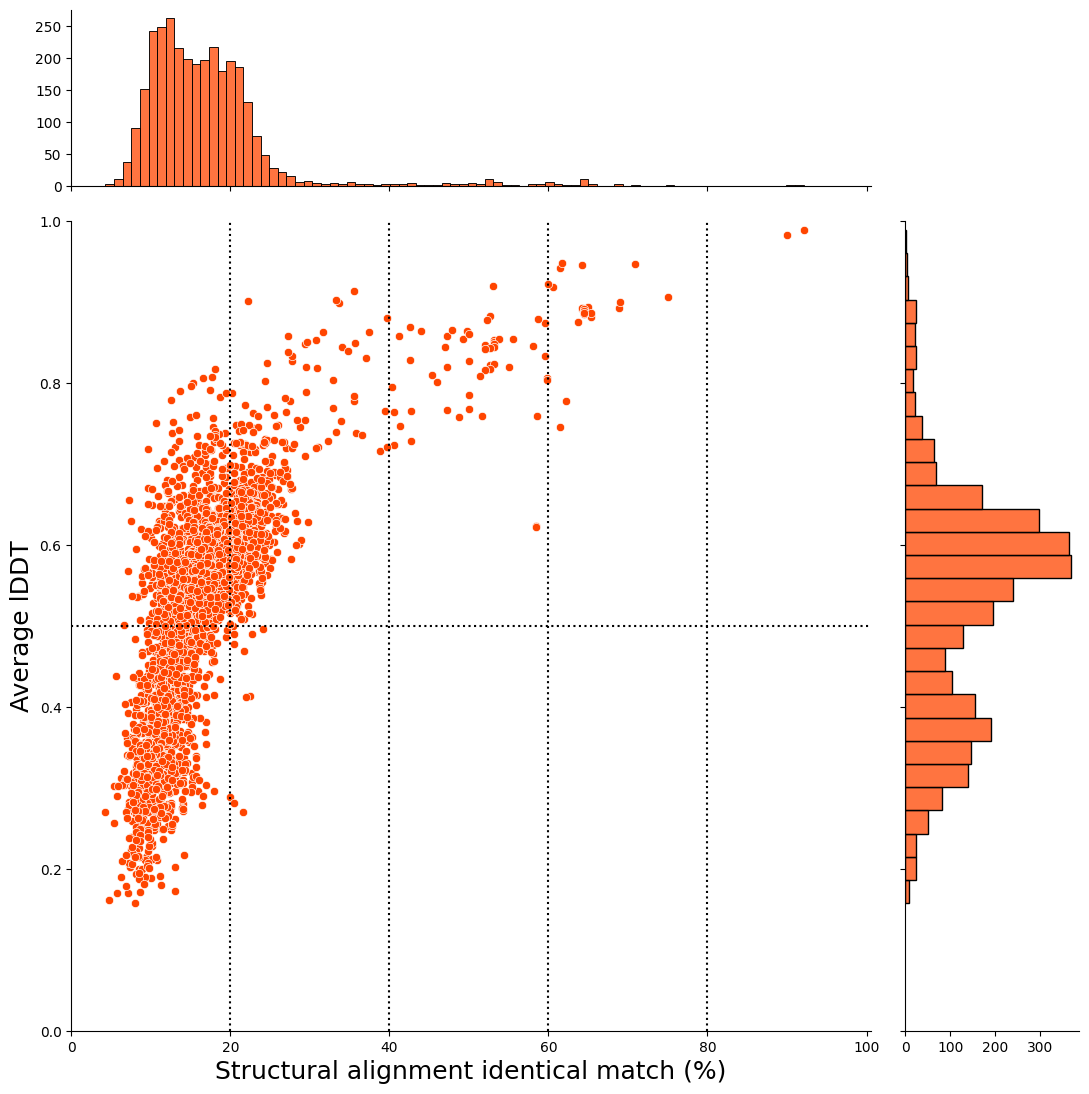

In [6]:
foldseek_filter_viz = foldseek_result.to_pandas()
sns.jointplot(
    data=foldseek_filter_viz,
    x="pident", # structural alignment identical match from foldseek result
    y="lddt",
    color="orangered",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(0,100.5)
plt.ylim(0,1)
plt.xlabel("Structural alignment identical match (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Parse pairwise alignment result (water and needle)

In [7]:
def parse_needle_water_result(file_path: str):
    with open(file_path, "r", encoding="utf-8") as file:
        data = file.readlines()
        
    result = {
        "UniProt Accession": None,
        "foldseek hit": None,
        "Length": None,
        "Identity": None,
        "Identity_percent": None,
        "Similarity": None,
        "Similarity_percent": None,
        "Gaps": None,
        "Gaps_percent": None,
        "Score": None
    }
    
    for line in data:
        if line.startswith('# 1:'):
            result['UniProt Accession'] = line.split(':')[1].strip()
        elif line.startswith('# 2:'):
            result['foldseek hit'] = line.split(':')[1].strip()
        elif line.startswith('# Length:'):
            result['Length'] = int(line.split()[2])
        elif line.startswith('# Identity:'):
            result['Identity'] = line.split()[2]
            result['Identity_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Similarity:'):
            result['Similarity'] = line.split()[2]
            result['Similarity_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Gaps:'):
            result['Gaps'] = line.split()[2]
            result['Gaps_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Score:'):
            result['Score'] = float(line.split()[2])
            
    return result

In [8]:
water_result_dir = pathlib.Path(water_result_dir_path)
needle_result_dir = pathlib.Path(needle_result_dir_path)

# Initialize empty lists to store DataFrames
water_dfs = []
needle_dfs = []

# Collect all water results
for result_file in water_result_dir.glob("*_align.water"):
    parsed_data = parse_needle_water_result(result_file)
    water_dfs.append(pl.DataFrame([parsed_data]))

# Collect all needle results    
for result_file in needle_result_dir.glob("*_align.needle"):
    parsed_data = parse_needle_water_result(result_file)
    needle_dfs.append(pl.DataFrame([parsed_data]))

# Combine all results and sort only if there are results
water_result = (pl.concat(water_dfs, how='vertical')
                .sort(["UniProt Accession", "foldseek hit"]) 
                if water_dfs else pl.DataFrame()).with_columns(
                    pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession"), # add removing AF- prefix
                    pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit") # add removing AF- prefix
                )

needle_result = (pl.concat(needle_dfs, how='vertical')
                 .sort(["UniProt Accession", "foldseek hit"])
                 if needle_dfs else pl.DataFrame()).with_columns(
                    pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession"), # add removing AF- prefix
                    pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit") # add removing AF- prefix
                )

display(water_result)
display(needle_result)

UniProt Accession,foldseek hit,Length,Identity,Identity_percent,Similarity,Similarity_percent,Gaps,Gaps_percent,Score
str,str,i64,str,f64,str,f64,str,f64,f64
"""A0A0N7KTX9""","""P45844""",329,"""74/329""",22.5,"""149/329""",45.3,"""39/329""",11.9,215.5
"""A0A0N7KTX9""","""Q86UK0""",438,"""95/438""",21.7,"""140/438""",32.0,"""170/438""",38.8,74.5
"""A0A0N7KTX9""","""Q9H172""",283,"""60/283""",21.2,"""127/283""",44.9,"""21/283""",7.4,190.5
"""A0A0N7KTX9""","""Q9H221""",288,"""62/288""",21.5,"""111/288""",38.5,"""40/288""",13.9,121.0
"""A0A0N7KTX9""","""Q9H222""",343,"""85/343""",24.8,"""146/343""",42.6,"""47/343""",13.7,199.0
…,…,…,…,…,…,…,…,…,…
"""Q9LGI2""","""Q99877""",141,"""84/141""",59.6,"""106/141""",75.2,"""18/141""",12.8,413.5
"""Q9LGI2""","""Q99879""",141,"""83/141""",58.9,"""104/141""",73.8,"""18/141""",12.8,409.5
"""Q9LGI2""","""Q99880""",129,"""80/129""",62.0,"""100/129""",77.5,"""6/129""",4.7,405.5


UniProt Accession,foldseek hit,Length,Identity,Identity_percent,Similarity,Similarity_percent,Gaps,Gaps_percent,Score
str,str,i64,str,f64,str,f64,str,f64,f64
"""A0A0N7KTX9""","""P45844""",708,"""75/708""",10.6,"""152/708""",21.5,"""411/708""",58.1,208.5
"""A0A0N7KTX9""","""Q86UK0""",2646,"""86/2646""",3.3,"""131/2646""",5.0,"""2370/2646""",89.6,60.5
"""A0A0N7KTX9""","""Q9H172""",675,"""70/675""",10.4,"""143/675""",21.2,"""377/675""",55.9,178.5
"""A0A0N7KTX9""","""Q9H221""",713,"""72/713""",10.1,"""121/713""",17.0,"""426/713""",59.7,106.0
"""A0A0N7KTX9""","""Q9H222""",679,"""85/679""",12.5,"""147/679""",21.6,"""380/679""",56.0,196.0
…,…,…,…,…,…,…,…,…,…
"""Q9LGI2""","""Q99877""",154,"""84/154""",54.5,"""106/154""",68.8,"""29/154""",18.8,411.5
"""Q9LGI2""","""Q99879""",154,"""83/154""",53.9,"""104/154""",67.5,"""29/154""",18.8,407.5
"""Q9LGI2""","""Q99880""",154,"""80/154""",51.9,"""100/154""",64.9,"""29/154""",18.8,403.5


In [9]:
alignment_result = water_result.join(
    needle_result,
    on=["UniProt Accession", "foldseek hit"],
    how="inner",
    coalesce=True,
    suffix="_needle"
).rename(
    {
        "Length": "Length_water",
        "Identity": "Identity_water",
        "Identity_percent": "Identity_percent_water",
        "Similarity": "Similarity_water",
        "Similarity_percent": "Similarity_percent_water",
        "Gaps": "Gaps_water",
        "Gaps_percent": "Gaps_percent_water",
        "Score": "Score_water"
    }
).select(
    [
        "UniProt Accession",
        "foldseek hit",
        "Length_water",
        "Length_needle",
        "Identity_water",
        "Identity_needle",
        "Identity_percent_water",
        "Identity_percent_needle",
        "Similarity_percent_water",
        "Similarity_percent_needle",
        "Gaps_water",
        "Gaps_needle",
        "Gaps_percent_water",
        "Gaps_percent_needle",
        "Score_water",
        "Score_needle"
    ]
)

display(alignment_result)

UniProt Accession,foldseek hit,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""A0A0N7KTX9""","""P45844""",329,708,"""74/329""","""75/708""",22.5,10.6,45.3,21.5,"""39/329""","""411/708""",11.9,58.1,215.5,208.5
"""A0A0N7KTX9""","""Q86UK0""",438,2646,"""95/438""","""86/2646""",21.7,3.3,32.0,5.0,"""170/438""","""2370/2646""",38.8,89.6,74.5,60.5
"""A0A0N7KTX9""","""Q9H172""",283,675,"""60/283""","""70/675""",21.2,10.4,44.9,21.2,"""21/283""","""377/675""",7.4,55.9,190.5,178.5
"""A0A0N7KTX9""","""Q9H221""",288,713,"""62/288""","""72/713""",21.5,10.1,38.5,17.0,"""40/288""","""426/713""",13.9,59.7,121.0,106.0
"""A0A0N7KTX9""","""Q9H222""",343,679,"""85/343""","""85/679""",24.8,12.5,42.6,21.6,"""47/343""","""380/679""",13.7,56.0,199.0,196.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Q9LGI2""","""Q99877""",141,154,"""84/141""","""84/154""",59.6,54.5,75.2,68.8,"""18/141""","""29/154""",12.8,18.8,413.5,411.5
"""Q9LGI2""","""Q99879""",141,154,"""83/141""","""83/154""",58.9,53.9,73.8,67.5,"""18/141""","""29/154""",12.8,18.8,409.5,407.5
"""Q9LGI2""","""Q99880""",129,154,"""80/129""","""80/154""",62.0,51.9,77.5,64.9,"""6/129""","""29/154""",4.7,18.8,405.5,403.5


&nbsp;


&nbsp;

## Integrate foldseek result and pairwise alignment result

- This time, **exclude the ones that are null in pairwise alignment result, which means the current UniProt entry is obsolete**

In [10]:
join_foldseek = foldseek_result.join(
    alignment_result,
    on=["UniProt Accession", "foldseek hit"],
    how="left",
    coalesce=True
).filter( # filter out null alignment result (this means current UniProt entry is obsolete)
    pl.col("Length_water").is_not_null() & 
    pl.col("Length_needle").is_not_null()
).unique()


print(join_foldseek.group_by(["UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(join_foldseek.head())

shape: (2_805, 41)
┌─────────────┬────────────┬──────┬────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ UniProt     ┆ foldseek   ┆ From ┆ evalue ┆ … ┆ Gaps_perce ┆ Gaps_perce ┆ Score_wate ┆ Score_need │
│ Accession   ┆ hit        ┆ ---  ┆ ---    ┆   ┆ nt_water   ┆ nt_needle  ┆ r          ┆ le         │
│ ---         ┆ ---        ┆ u32  ┆ u32    ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│ str         ┆ str        ┆      ┆        ┆   ┆ u32        ┆ u32        ┆ u32        ┆ u32        │
╞═════════════╪════════════╪══════╪════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ Q10KW4      ┆ Q96HD9     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ Q0J381      ┆ Q6MZW2     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ Q0J381      ┆ Q8N9V3     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ Q6YZI0      ┆ Q7Z3J3     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1         

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""Os03g0367900""","""Q10KW4""","""Q96HD9""",0.05165,0.473,14,11.2,0.112,28,10,215,222,13,206,319,248,0.928,0.608,0.3897,0.392,0.2945,0.2945,7.969,"""TVHVTGFKKFHGVAENPTEKI-VRNLESFM…","""RVAVTG-------GTHGNEMSGVYLARHWL…",124,"""0.350,0.392,0.425,0.488,0.513,…",175,347,"""39/175""","""50/347""",22.3,14.4,37.1,25.9,"""49/175""","""153/347""",28.0,44.1,37.0,15.0
"""Os09g0249000""","""Q0J381""","""Q6MZW2""",0.0001229,0.999,23,10.6,0.106,30,31,288,332,609,834,842,282,0.777,0.268,0.309,0.3438,0.1635,0.1635,9.421,"""GTAYAFGGEFTPRVPVDNAMYAFDLKSQCW…","""RFGFIF--NK-----SDPAVHKVDLETM--…",172,"""0.342,0.356,0.299,0.281,0.250,…",115,1018,"""25/115""","""52/1018""",21.7,5.1,34.8,8.0,"""41/115""","""862/1018""",35.7,84.7,37.5,28.0
"""Os09g0249000""","""Q0J381""","""Q8N9V3""",0.0001168,1.0,35,8.9,0.089,34,8,328,332,2,309,476,382,0.967,0.647,0.3494,0.4522,0.3378,0.3378,11.24,"""WVKLEQKGDGPGARSSHAITLVGGTAYAFG…","""VKLIHTLADHGDDVN--CCAFSFSLLATCS…",213,"""0.255,0.276,0.320,0.316,0.494,…",125,794,"""29/125""","""5/794""",23.2,0.6,35.2,1.0,"""58/125""","""780/794""",46.4,98.2,47.5,30.0
"""Os08g0559300""","""Q6YZI0""","""Q7Z3J3""",0.000002,1.0,47,10.1,0.101,109,34,924,927,26,886,1758,1077,0.961,0.49,0.3712,0.1686,0.09825,0.09825,34.49,"""GKDTLRYANILRSRNKFAEALQLYNNVLEK…","""STRGFYFAKLYYEAKEYDLAKKYICTYINV…",566,"""0.493,0.455,0.562,0.622,0.794,…",830,2014,"""156/830""","""176/2014""",18.8,8.7,34.8,16.1,"""250/830""","""1343/2014""",30.1,66.7,125.5,110.0
"""Os08g0559300""","""Q6YZI0""","""P23610""",0.05142,0.442,25,13.1,0.131,61,24,423,927,9,370,371,465,0.431,0.976,0.3527,0.08579,0.1653,0.1653,21.44,"""GAVPAKQQLDGKDTLRYANILRSRNK----…","""GGGGAGPGPEAGDFLARYRLVSNKLKKRFL…",236,"""0.469,0.562,0.639,0.750,0.938,…",167,953,"""41/167""","""97/953""",24.6,10.2,35.9,16.9,"""32/167""","""608/953""",19.2,63.8,65.5,40.5


&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Create Scatter Plot for all hits (x-axis: Similarity_percent_needle) Global alignment

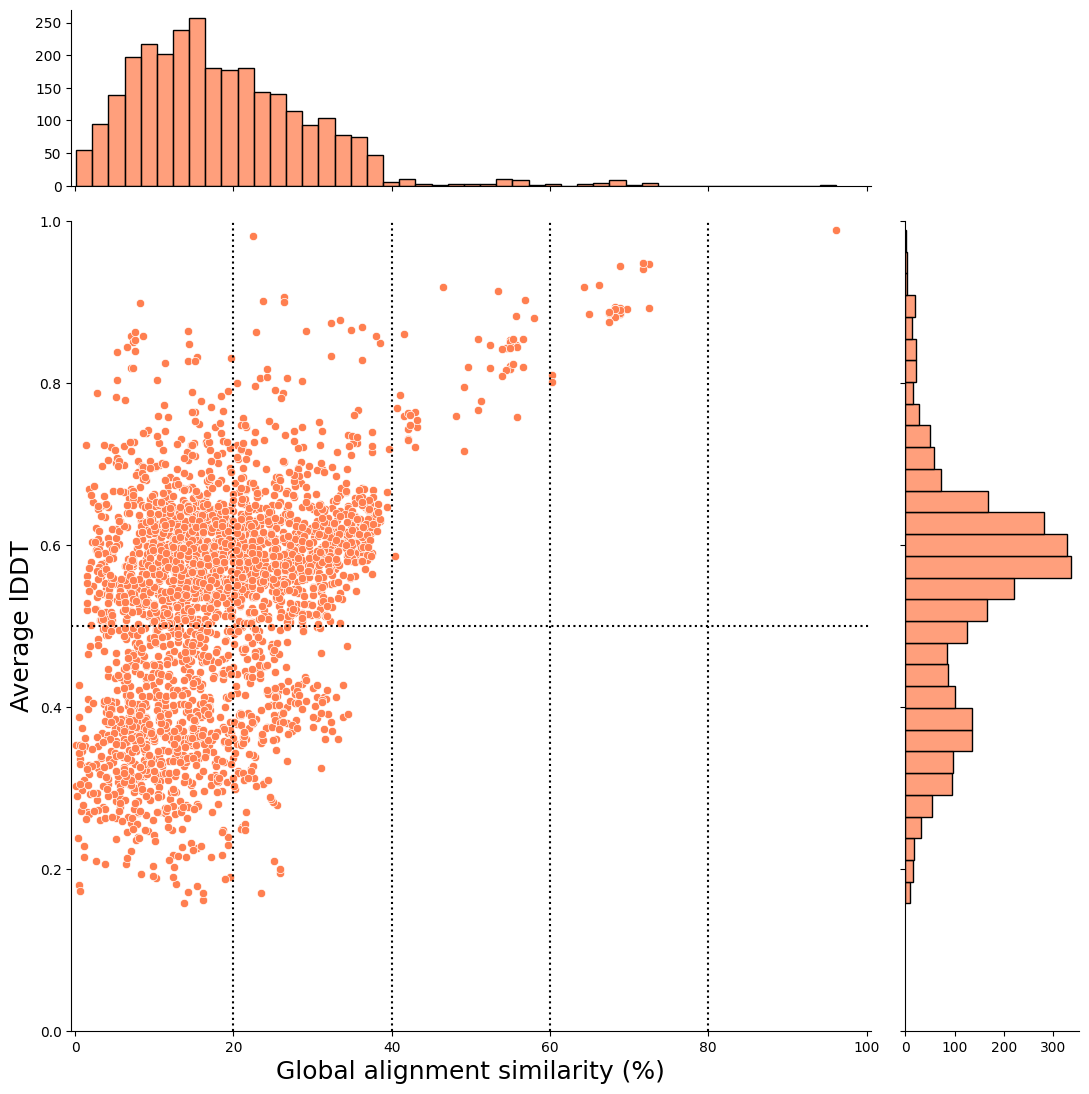

In [11]:
foldseek_filter_viz2 = join_foldseek.to_pandas()

sns.jointplot(
    data=foldseek_filter_viz2,
    x="Similarity_percent_needle",
    y="lddt",
    color="coral",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100.5)
plt.ylim(0,1)
plt.xlabel("Global alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;


## Create Scatter Plot for all hits (x-axis: Similarity_percent_water) Local Alignment

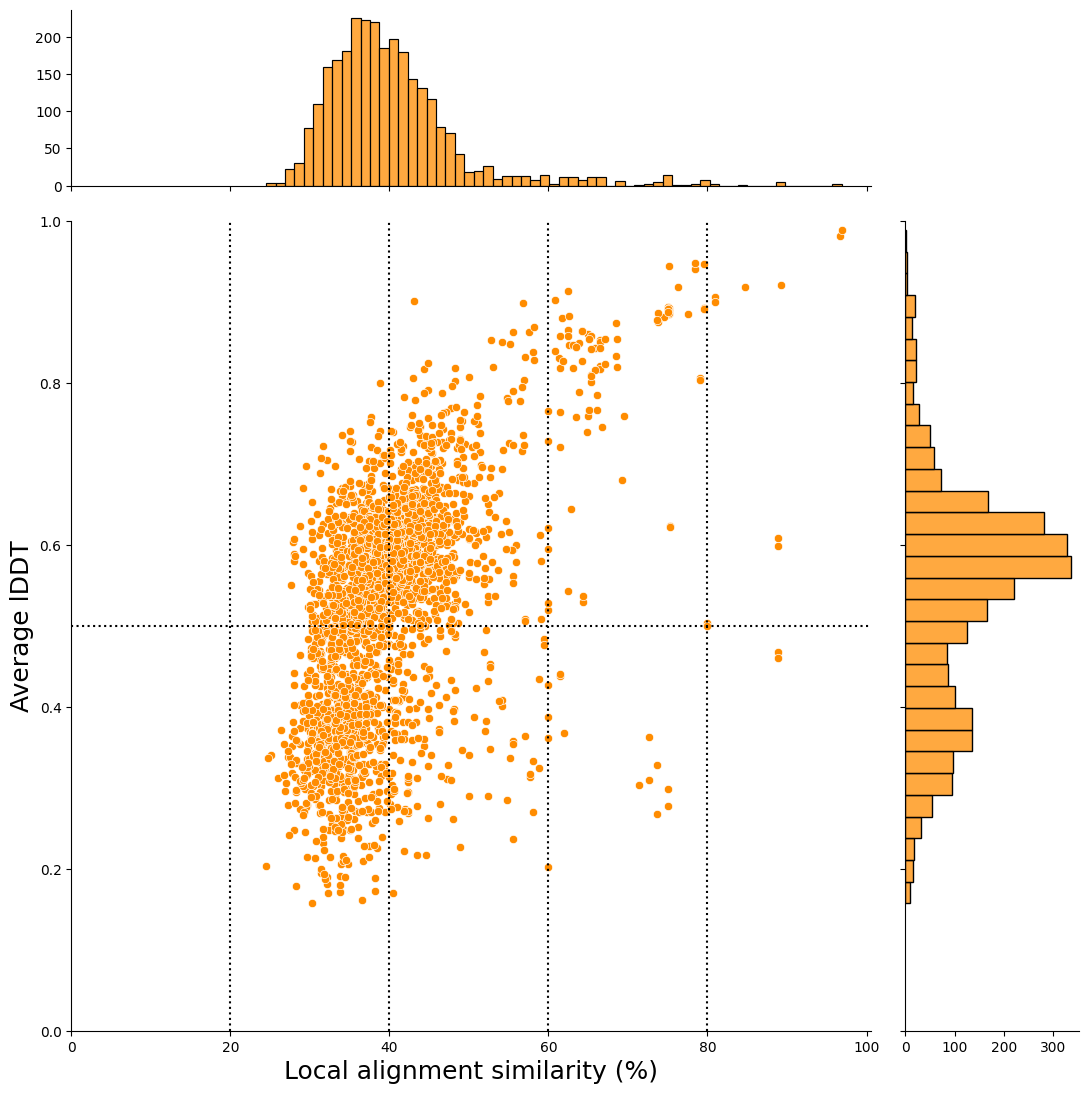

In [12]:
foldseek_filter_viz2 = join_foldseek.to_pandas()

sns.jointplot(
    data=foldseek_filter_viz2,
    x="Similarity_percent_water", # local alignment similarity
    y="lddt",
    color="darkorange",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(0,100.5)
plt.ylim(0,1)
plt.xlabel("Local alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Counting foldseek hits in Gene level

In [13]:
all_gene_list = pl.read_csv(
    query_gene_list_tsv_path,
    separator='\t'
).select(
    "From"
).unique()

hit_count = all_gene_list.join(
    join_foldseek,
    on="From",
    how="left",
    coalesce=True
).group_by("From", maintain_order=True).agg(
    (pl.col("foldseek hit").count().alias("target hit count (gene level vs uniprot accession)")),
    (pl.col("foldseek hit").is_null().all().alias("foldseek no hit"))
).sort(
    ["target hit count (gene level vs uniprot accession)"], descending=True
)

display(hit_count)

From,target hit count (gene level vs uniprot accession),foldseek no hit
str,u32,bool
"""Os03g0638800""",467,false
"""Os01g0810800""",354,false
"""Os09g0249000""",265,false
"""Os09g0568400""",244,false
"""Os01g0924300""",238,false
…,…,…
"""Os12g0269700""",0,true
"""Os06g0127250""",0,true
"""Os12g0577733""",0,true


&nbsp;

&nbsp;

&nbsp;

# Caution:
- The filtering steps that are executed below can be changed freely.

&nbsp;

## Filtering Condition1

- alignment coverage >= 0.5

In [14]:
condition1 = join_foldseek.filter(
        (pl.col("qcov") >= 0.5) &
        (pl.col("tcov") >= 0.5)
    ).sort(
        by=["From", "foldseek hit", "UniProt Accession"], # sort by From, foldseek hit, UniProt Accession
        descending=[False, False, False]
    )

condition1_rm = condition1.filter(
        (pl.col("qcov") < 0.5) |
        (pl.col("tcov") < 0.5)
    )

print(condition1.group_by(["From"], maintain_order=True).n_unique())
display(condition1)

shape: (33, 41)
┌────────────┬────────────┬───────────┬────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ From       ┆ UniProt    ┆ foldseek  ┆ evalue ┆ … ┆ Gaps_perc ┆ Gaps_perc ┆ Score_wat ┆ Score_nee │
│ ---        ┆ Accession  ┆ hit       ┆ ---    ┆   ┆ ent_water ┆ ent_needl ┆ er        ┆ dle       │
│ str        ┆ ---        ┆ ---       ┆ u32    ┆   ┆ ---       ┆ e         ┆ ---       ┆ ---       │
│            ┆ u32        ┆ u32       ┆        ┆   ┆ u32       ┆ ---       ┆ u32       ┆ u32       │
│            ┆            ┆           ┆        ┆   ┆           ┆ u32       ┆           ┆           │
╞════════════╪════════════╪═══════════╪════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Os01g01048 ┆ 2          ┆ 8         ┆ 9      ┆ … ┆ 8         ┆ 8         ┆ 8         ┆ 7         │
│ 00         ┆            ┆           ┆        ┆   ┆           ┆           ┆           ┆           │
│ Os01g01523 ┆ 1          ┆ 43        ┆ 34     ┆ … ┆ 24        ┆ 25        

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""Os01g0104800""","""Q657Z6""","""P35712""",0.02317,0.051,25,13.6,0.136,97,10,645,645,1,575,828,712,0.986,0.694,0.5484,0.04904,0.04194,0.04194,58.79,"""WKRPPTVKPPVMAASASDDDEIDAFHKHRD…","""MSSKQATSPFACAADGEDAMT---------…",402,"""0.469,0.531,0.656,0.844,0.875,…",277,1214,"""63/277""","""69/1214""",22.7,5.7,40.1,10.0,"""49/277""","""955/1214""",17.7,78.7,93.0,81.0
"""Os01g0104800""","""Q657Z6""","""Q05084""",0.09918,0.076,20,11.5,0.115,59,182,564,645,1,452,483,509,0.594,0.936,0.569,0.07617,0.0953,0.0953,43.74,"""ASNHQVKVP-------DGEHSF--------…","""MSGHKCSYPWDLQDRYAQDKSVVNKMQQKY…",267,"""0.556,0.594,0.719,0.844,0.775,…",502,773,"""95/502""","""99/773""",18.9,12.8,35.3,23.8,"""165/502""","""418/773""",32.9,54.1,94.5,87.5
"""Os01g0104800""","""Q657Z6""","""Q16649""",0.06895,0.082,20,10.8,0.108,65,59,624,645,1,462,462,606,0.878,1.0,0.5736,0.06896,0.09013,0.09013,46.63,"""FDLEGISENETDDSEGDEDGNMDKAAYDEW…","""MQLRKMQTVKKEQASLDASSNVDKMMV---…",357,"""0.500,0.500,0.611,0.875,0.917,…",444,774,"""88/444""","""92/774""",19.8,11.9,36.7,22.2,"""135/444""","""441/774""",30.4,57.0,90.5,74.5
"""Os01g0104800""","""Q658C6""","""Q5SNT2""",0.06097,0.254,12,12.5,0.125,48,179,535,645,241,578,666,383,0.553,0.508,0.6024,0.112,0.1088,0.1088,42.87,"""AIKASNHQVKVPDGEHSF-------ETYVK…","""APGTTVPLALPPGGNGSATPDNGTTPGAEG…",264,"""0.333,0.500,0.375,0.458,0.500,…",97,1213,"""23/97""","""25/1213""",23.7,2.1,36.1,3.1,"""18/97""","""1115/1213""",18.6,91.9,33.0,14.0
"""Os01g0104800""","""Q658C6""","""Q8IVH2""",0.08771,0.051,28,11.3,0.113,85,40,644,645,2,611,680,756,0.938,0.897,0.5523,0.06949,0.06659,0.06659,50.57,"""MIPLHDHDMESEDDLEHPVFDLEGISENET…","""MVESASETIRSAPSGQNGVGSLSGQ-----…",374,"""0.312,0.450,0.600,0.778,0.812,…",203,978,"""44/203""","""95/978""",21.7,9.7,39.4,16.2,"""46/203""","""631/978""",22.7,64.5,55.5,40.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os12g0411700""","""Q2QT07""","""Q9H222""",1.5260e-35,1.0,18,26.0,0.26,175,59,701,713,1,649,651,673,0.902,0.997,0.748,0.768,0.8375,0.8375,8.098,"""VDDRWAPSAGGGVGTFDGVEVPLPAAQAVS…","""MGDLSSLTPGGSMG------LQVNRGSQSS…",444,"""0.214,0.444,0.500,0.667,0.667,…",682,762,"""187/682""","""188/762""",27.4,24.7,46.5,42.3,"""92/682""","""160/762""",13.5,21.0,608.0,604.0
"""Os12g0411700""","""Q0INQ2""","""Q9UNQ0""",5.7790e-39,1.0,17,28.4,0.284,185,73,692,713,2,646,655,653,0.87,0.985,0.7544,0.7535,0.8154,0.8154,5.638,"""TFDGVEVPLPAAQAVSLPRAAADVVD----…","""SSSNVEVFIPVSQGNTNGFPATASNDLKAF…",427,"""0.469,0.562,0.719,0.875,1.000,…",667,764,"""209/667""","""209/764""",31.3,27.4,48.9,43.2,"""77/667""","""160/764""",11.5,20.9,696.5,687.5
"""Os12g0411700""","""Q2QT07""","""Q9UNQ0""",7.2700e-38,1.0,19,28.7,0.287,187,73,692,713,2,646,655,653,0.87,0.985,0.7453,0.7522,0.8149,0.8149,6.221,"""TFDGVEVPLPAAQAVS--LPRAAADV--VD…","""SSSNVEVFIPVSQGNTNGFPATASNDLKAF…",425,"""0.438,0.562,0.750,0.812,0.850,…",667,764,"""209/667""","""209/764""",31.3,27.4,48.9,43.2,"""77/667""","""160/764""",11.5,20.9,696.5,687.5


&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Filtering Condition2

- If there are hits with the same target for the same gene-derived UniProt ID, the one with the highest qcov is selected, and if the qcov is the same, the one with the highest lDDT is selected.
- **Note that in this study, we leave the states with the same foldseek hit even if the rice genes are different.**

In [15]:
condition2 = condition1.sort(
    by=["qcov", "lddt"],
    descending=[True, True]
).group_by(
    ["From", "foldseek hit"],
    maintain_order=True
).agg(
    pl.all().first()
).sort(
    by=["From", "UniProt Accession", "foldseek hit"],
    descending=[False, False, False]
).select(
    "From",
    "UniProt Accession",
    "foldseek hit",
    "evalue",
    "prob",
    "gapopen",
    "pident",
    "fident",
    "nident",
    "qstart",
    "qend",
    "qlen",
    "tstart",
    "tend",
    "tlen",
    "alnlen",
    "qcov",
    "tcov",
    "lddt",
    "qtmscore",
    "ttmscore",
    "alntmscore",
    "rmsd",
    "mismatch",
    "Length_water",
    "Length_needle",
    "Identity_water",
    "Identity_needle",
    "Identity_percent_water",
    "Identity_percent_needle",
    "Similarity_percent_water",
    "Similarity_percent_needle",
    "Gaps_water",
    "Gaps_percent_water",
    "Gaps_needle",
    "Gaps_percent_needle",
    "Score_water",
    "Score_needle"
)

display(condition2)

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,mismatch,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_percent_water,Gaps_needle,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,str,str,f64,f64,f64,f64,str,f64,str,f64,f64,f64
"""Os01g0104800""","""Q657Z6""","""P35712""",0.02317,0.051,25,13.6,0.136,97,10,645,645,1,575,828,712,0.986,0.694,0.5484,0.04904,0.04194,0.04194,58.79,402,277,1214,"""63/277""","""69/1214""",22.7,5.7,40.1,10.0,"""49/277""",17.7,"""955/1214""",78.7,93.0,81.0
"""Os01g0104800""","""Q657Z6""","""Q05084""",0.09918,0.076,20,11.5,0.115,59,182,564,645,1,452,483,509,0.594,0.936,0.569,0.07617,0.0953,0.0953,43.74,267,502,773,"""95/502""","""99/773""",18.9,12.8,35.3,23.8,"""165/502""",32.9,"""418/773""",54.1,94.5,87.5
"""Os01g0104800""","""Q657Z6""","""Q16649""",0.06895,0.082,20,10.8,0.108,65,59,624,645,1,462,462,606,0.878,1.0,0.5736,0.06896,0.09013,0.09013,46.63,357,444,774,"""88/444""","""92/774""",19.8,11.9,36.7,22.2,"""135/444""",30.4,"""441/774""",57.0,90.5,74.5
"""Os01g0104800""","""Q657Z6""","""Q9H094""",0.09335,0.057,20,11.0,0.11,74,1,645,645,4,494,633,670,1.0,0.776,0.5988,0.07113,0.07221,0.07221,53.34,392,418,927,"""94/418""","""105/927""",22.5,11.3,35.9,18.4,"""143/418""",34.2,"""576/927""",62.1,100.5,74.5
"""Os01g0104800""","""Q657Z6""","""Q9Y2H5""",0.01516,0.138,24,11.5,0.115,84,1,626,645,354,974,1048,733,0.971,0.593,0.6024,0.09045,0.05792,0.05792,57.59,430,631,1233,"""109/631""","""119/1233""",17.3,9.7,33.4,18.9,"""221/631""",35.0,"""773/1233""",62.7,95.0,85.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os12g0411700""","""Q2QT07""","""P45844""",2.2630e-35,1.0,21,24.3,0.243,176,39,706,713,1,676,678,724,0.937,0.997,0.7305,0.7185,0.754,0.754,11.46,444,675,791,"""192/675""","""194/791""",28.4,24.5,48.9,42.1,"""85/675""",12.6,"""191/791""",24.1,655.0,631.5
"""Os12g0411700""","""Q2QT07""","""Q9H172""",8.0660e-35,1.0,20,23.0,0.23,158,54,701,713,4,645,646,689,0.909,0.994,0.7436,0.7327,0.805,0.805,9.327,443,668,769,"""178/668""","""184/769""",26.6,23.9,46.7,42.1,"""101/668""",15.1,"""179/769""",23.3,578.5,575.0
"""Os12g0411700""","""Q2QT07""","""Q9H222""",1.5260e-35,1.0,18,26.0,0.26,175,59,701,713,1,649,651,673,0.902,0.997,0.748,0.768,0.8375,0.8375,8.098,444,682,762,"""187/682""","""188/762""",27.4,24.7,46.5,42.3,"""92/682""",13.5,"""160/762""",21.0,608.0,604.0


&nbsp;

&nbsp;

&nbsp;

## Filtering Condition3

- Select hits that can be converted to Ensembl gene id and HGNC Gene nomenclature with TogoID API
- https://togoid.dbcls.jp/

In [16]:
togoid_convert = pl.read_csv(
    togoid_convert_tsv_path,
    separator='\t'
).rename(
    {
        "uniprot_id" : "foldseek hit"
    }
).filter(
    pl.col("ensembl_gene_id").is_not_null() &
    pl.col("hgnc_symbol_id").is_not_null() # add HGNC Gene nomenclature information filtering condition
).sort(
    by=["foldseek hit"],
    descending=[False]
)

display(togoid_convert)

foldseek hit,ensembl_protein_id,ensembl_transcript_id,ensembl_gene_id,hgnc_id,hgnc_symbol_id
str,str,str,str,i64,str
"""A0A075B759""","""ENSP00000463419""","""ENST00000581164""","""ENSG00000271567""",33997,"""PPIAL4E"""
"""A0A075B767""","""ENSP00000464619""","""ENST00000584068""","""ENSG00000270339""",53889,"""PPIAL4H"""
"""A0A0B4J2A2""","""ENSP00000463057""","""ENST00000585245""","""ENSG00000288867""",33995,"""PPIAL4C"""
"""A0A1W2PPE2""","""ENSP00000491494""","""ENST00000638408""","""ENSG00000284283""",53847,"""TAF11L4"""
"""A0A1W2PQ09""","""ENSP00000491846""","""ENST00000510838""","""ENSG00000283740""",53854,"""TAF11L11"""
…,…,…,…,…,…
"""Q9Y6S9""","""ENSP00000452027""","""ENST00000555647""","""ENSG00000198208""",20222,"""RPS6KL1"""
"""Q9Y6S9""","""ENSP00000450567""","""ENST00000557413""","""ENSG00000198208""",20222,"""RPS6KL1"""
"""Q9Y6X3""","""ENSP00000262815""","""ENST00000262815""","""ENSG00000129933""",29140,"""MAU2"""


In [17]:
condition3 = condition2.join(
    togoid_convert,
    on="foldseek hit",
    how="left",
    coalesce=True
).drop(
    [
        "ensembl_transcript_id",
        "hgnc_id"
    ]
).filter( 
    pl.col("ensembl_gene_id").is_not_null() &
    pl.col("hgnc_symbol_id").is_not_null() # add HGNC Gene nomenclature information filtering condition
).select(
    [
        "From",
        "UniProt Accession",
        "foldseek hit",
        "ensembl_protein_id",
        "ensembl_gene_id",
        "hgnc_symbol_id",
        "evalue",
        "prob",
        "gapopen",
        "pident",
        "fident",
        "nident",
        "qstart",
        "qend",
        "qlen",
        "tstart",
        "tend",
        "tlen",
        "alnlen",
        "mismatch",
        "qcov",
        "tcov",
        "rmsd",
        "lddt",
        "qtmscore",
        "ttmscore",
        "alntmscore",
        "Length_water",
        "Length_needle",
        "Identity_water",
        "Identity_percent_water",
        "Identity_percent_needle",
        "Similarity_percent_water",
        "Similarity_percent_needle",
        "Gaps_water",
        "Gaps_percent_water",
        "Gaps_needle",
        "Gaps_percent_needle",
        "Score_water",
        "Score_needle"
    ]
).sort(
    by=["From", "foldseek hit", "UniProt Accession"], # sort by From, foldseek hit, UniProt Accession (change order)
    descending=[False, False, False]
)



print(condition3.group_by(["From", "UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(condition3)


shape: (867, 40)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ From      ┆ UniProt   ┆ foldseek  ┆ ensembl_p ┆ … ┆ Gaps_need ┆ Gaps_perc ┆ Score_wat ┆ Score_ne │
│ ---       ┆ Accession ┆ hit       ┆ rotein_id ┆   ┆ le        ┆ ent_needl ┆ er        ┆ edle     │
│ str       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ e         ┆ ---       ┆ ---      │
│           ┆ str       ┆ str       ┆ u32       ┆   ┆ u32       ┆ ---       ┆ u32       ┆ u32      │
│           ┆           ┆           ┆           ┆   ┆           ┆ u32       ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ Os01g0104 ┆ Q657Z6    ┆ P35712    ┆ 7         ┆ … ┆ 1         ┆ 1         ┆ 1         ┆ 1        │
│ 800       ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ Os01g0104 ┆ Q657Z6    ┆ Q05084    ┆ 5         ┆ … ┆ 1         ┆ 1       

From,UniProt Accession,foldseek hit,ensembl_protein_id,ensembl_gene_id,hgnc_symbol_id,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,mismatch,qcov,tcov,rmsd,lddt,qtmscore,ttmscore,alntmscore,Length_water,Length_needle,Identity_water,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_percent_water,Gaps_needle,Gaps_percent_needle,Score_water,Score_needle
str,str,str,str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,i64,str,f64,f64,f64,f64,str,f64,str,f64,f64,f64
"""Os01g0104800""","""Q657Z6""","""P35712""","""ENSP00000379644""","""ENSG00000110693""","""SOX6""",0.02317,0.051,25,13.6,0.136,97,10,645,645,1,575,828,712,402,0.986,0.694,58.79,0.5484,0.04904,0.04194,0.04194,277,1214,"""63/277""",22.7,5.7,40.1,10.0,"""49/277""",17.7,"""955/1214""",78.7,93.0,81.0
"""Os01g0104800""","""Q657Z6""","""P35712""","""ENSP00000434455""","""ENSG00000110693""","""SOX6""",0.02317,0.051,25,13.6,0.136,97,10,645,645,1,575,828,712,402,0.986,0.694,58.79,0.5484,0.04904,0.04194,0.04194,277,1214,"""63/277""",22.7,5.7,40.1,10.0,"""49/277""",17.7,"""955/1214""",78.7,93.0,81.0
"""Os01g0104800""","""Q657Z6""","""P35712""","""ENSP00000432134""","""ENSG00000110693""","""SOX6""",0.02317,0.051,25,13.6,0.136,97,10,645,645,1,575,828,712,402,0.986,0.694,58.79,0.5484,0.04904,0.04194,0.04194,277,1214,"""63/277""",22.7,5.7,40.1,10.0,"""49/277""",17.7,"""955/1214""",78.7,93.0,81.0
"""Os01g0104800""","""Q657Z6""","""P35712""","""ENSP00000433233""","""ENSG00000110693""","""SOX6""",0.02317,0.051,25,13.6,0.136,97,10,645,645,1,575,828,712,402,0.986,0.694,58.79,0.5484,0.04904,0.04194,0.04194,277,1214,"""63/277""",22.7,5.7,40.1,10.0,"""49/277""",17.7,"""955/1214""",78.7,93.0,81.0
"""Os01g0104800""","""Q657Z6""","""P35712""","""ENSP00000499737""","""ENSG00000110693""","""SOX6""",0.02317,0.051,25,13.6,0.136,97,10,645,645,1,575,828,712,402,0.986,0.694,58.79,0.5484,0.04904,0.04194,0.04194,277,1214,"""63/277""",22.7,5.7,40.1,10.0,"""49/277""",17.7,"""955/1214""",78.7,93.0,81.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os12g0411700""","""Q0INQ2""","""Q9UNQ0""","""ENSP00000498246""","""ENSG00000118777""","""ABCG2""",5.7790e-39,1.0,17,28.4,0.284,185,73,692,713,2,646,655,653,427,0.87,0.985,5.638,0.7544,0.7535,0.8154,0.8154,667,764,"""209/667""",31.3,27.4,48.9,43.2,"""77/667""",11.5,"""160/764""",20.9,696.5,687.5
"""Os12g0411700""","""Q0INQ2""","""Q9UNQ0""","""ENSP00000426917""","""ENSG00000118777""","""ABCG2""",5.7790e-39,1.0,17,28.4,0.284,185,73,692,713,2,646,655,653,427,0.87,0.985,5.638,0.7544,0.7535,0.8154,0.8154,667,764,"""209/667""",31.3,27.4,48.9,43.2,"""77/667""",11.5,"""160/764""",20.9,696.5,687.5
"""Os12g0411700""","""Q0INQ2""","""Q9UNQ0""","""ENSP00000237612""","""ENSG00000118777""","""ABCG2""",5.7790e-39,1.0,17,28.4,0.284,185,73,692,713,2,646,655,653,427,0.87,0.985,5.638,0.7544,0.7535,0.8154,0.8154,667,764,"""209/667""",31.3,27.4,48.9,43.2,"""77/667""",11.5,"""160/764""",20.9,696.5,687.5


&nbsp;

&nbsp;


In [18]:
foldseek_filter_viz = condition3.select(
    "From",
    "UniProt Accession",
    "foldseek hit",
    "qcov",
    "tcov",
    "rmsd",
    "lddt",
    "Identity_percent_needle",
    "Identity_percent_water",
    "Similarity_percent_needle",
    "Similarity_percent_water"
).unique(
    subset=["From", "UniProt Accession", "foldseek hit"]
).sort(
    by=["From"],
    descending=[False]
)

print(foldseek_filter_viz.group_by(["From", "UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(foldseek_filter_viz)

shape: (867, 11)
┌────────────┬────────────┬────────────┬──────┬───┬────────────┬───────────┬───────────┬───────────┐
│ From       ┆ UniProt    ┆ foldseek   ┆ qcov ┆ … ┆ Identity_p ┆ Identity_ ┆ Similarit ┆ Similarit │
│ ---        ┆ Accession  ┆ hit        ┆ ---  ┆   ┆ ercent_nee ┆ percent_w ┆ y_percent ┆ y_percent │
│ str        ┆ ---        ┆ ---        ┆ u32  ┆   ┆ dle        ┆ ater      ┆ _needle   ┆ _water    │
│            ┆ str        ┆ str        ┆      ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---       │
│            ┆            ┆            ┆      ┆   ┆ u32        ┆ u32       ┆ u32       ┆ u32       │
╞════════════╪════════════╪════════════╪══════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ Os01g01048 ┆ Q657Z6     ┆ Q9H094     ┆ 1    ┆ … ┆ 1          ┆ 1         ┆ 1         ┆ 1         │
│ 00         ┆            ┆            ┆      ┆   ┆            ┆           ┆           ┆           │
│ Os01g01048 ┆ Q657Z6     ┆ Q16649     ┆ 1    ┆ … ┆ 1          ┆ 1        

From,UniProt Accession,foldseek hit,qcov,tcov,rmsd,lddt,Identity_percent_needle,Identity_percent_water,Similarity_percent_needle,Similarity_percent_water
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""Os01g0104800""","""Q657Z6""","""Q9H094""",1.0,0.776,53.34,0.5988,11.3,22.5,18.4,35.9
"""Os01g0104800""","""Q657Z6""","""Q16649""",0.878,1.0,46.63,0.5736,11.9,19.8,22.2,36.7
"""Os01g0104800""","""Q658C6""","""Q5SNT2""",0.553,0.508,42.87,0.6024,2.1,23.7,3.1,36.1
"""Os01g0104800""","""Q658C6""","""Q96PX6""",0.741,0.913,68.24,0.5575,14.5,19.0,25.0,32.9
"""Os01g0104800""","""Q658C6""","""Q8IVH2""",0.938,0.897,50.57,0.5523,9.7,21.7,16.2,39.4
…,…,…,…,…,…,…,…,…,…,…
"""Os12g0411700""","""Q0INQ2""","""Q96S55""",0.794,0.705,29.47,0.3597,14.4,21.3,21.6,31.0
"""Os12g0411700""","""Q2QT07""","""Q9H172""",0.909,0.994,9.327,0.7436,23.9,26.6,42.1,46.7
"""Os12g0411700""","""Q0INQ2""","""Q8WWZ4""",0.903,0.515,25.25,0.4556,9.8,20.1,16.0,32.7


<Figure size 4000x4000 with 0 Axes>

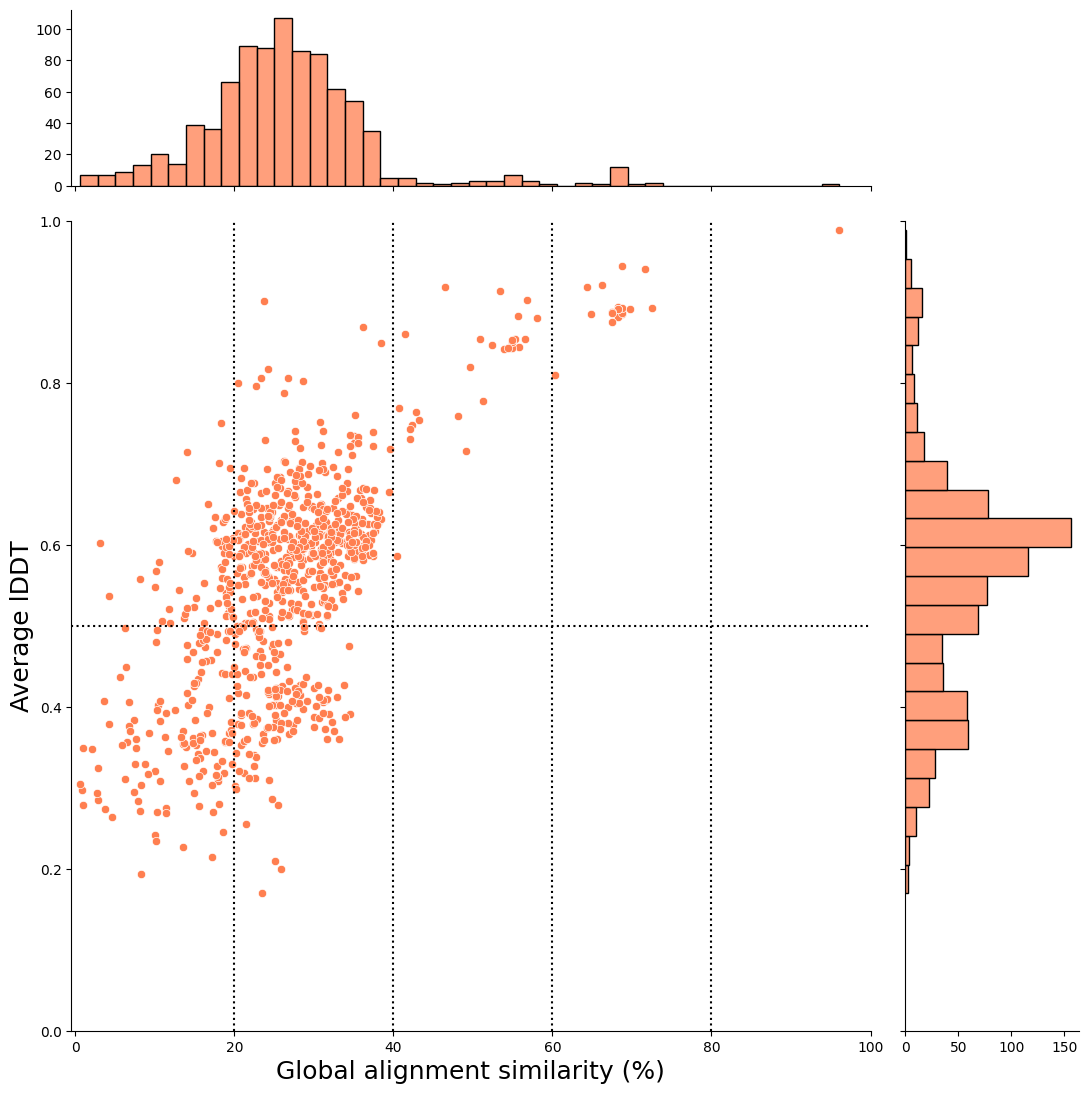

In [19]:
foldseek_filter_viz_pd = foldseek_filter_viz.to_pandas()

plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=foldseek_filter_viz_pd,
    x="Similarity_percent_needle",
    y="lddt",
    color="coral",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100)
plt.ylim(0,1)
plt.xlabel("Global alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

<Figure size 4000x4000 with 0 Axes>

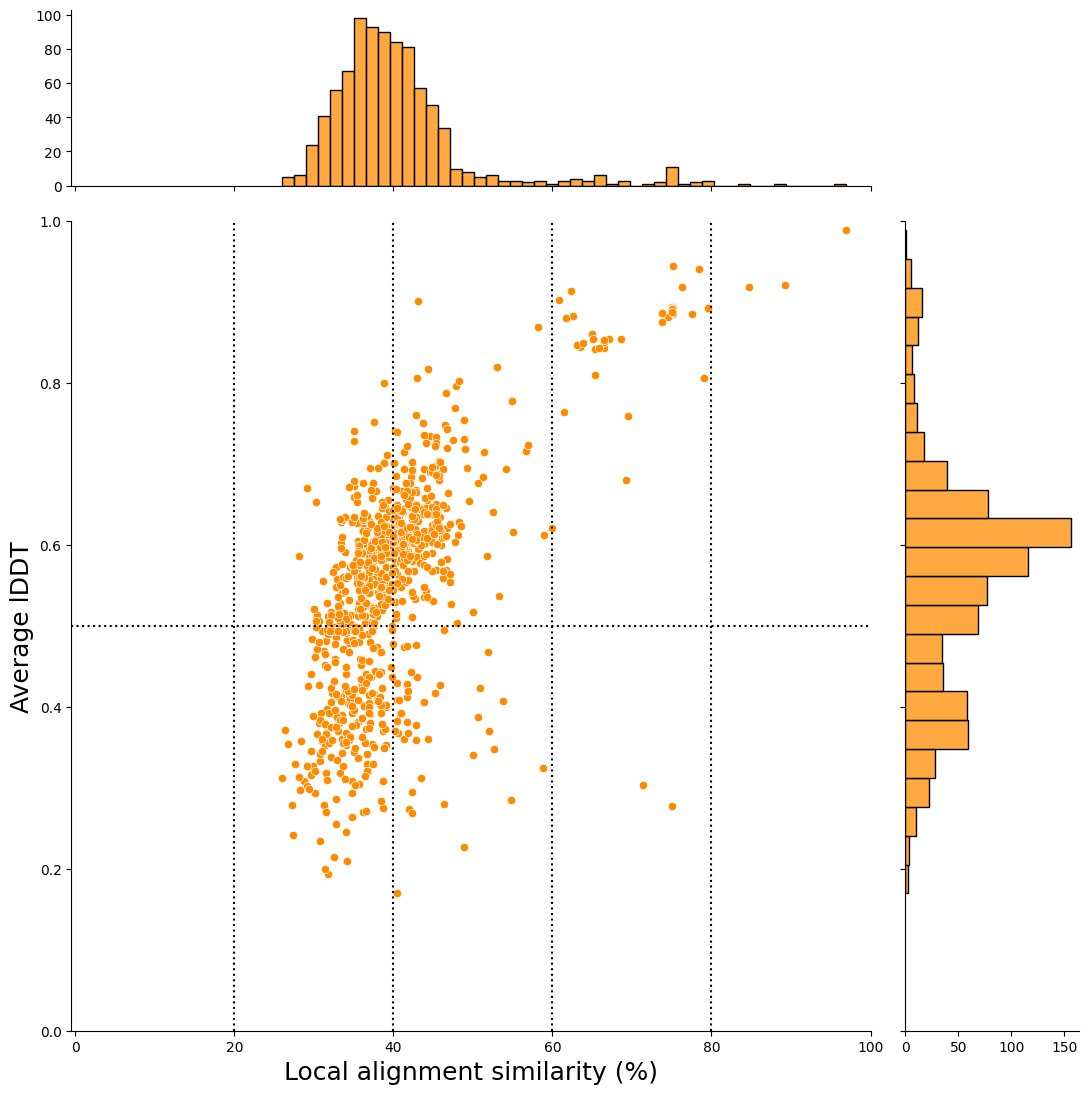

In [20]:
foldseek_filter_viz_pd = foldseek_filter_viz.to_pandas()

plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=foldseek_filter_viz_pd,
    x="Similarity_percent_water",
    y="lddt",
    color="darkorange",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100)
plt.ylim(0,1)
plt.xlabel("Local alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")

plt.axhline(y=0.5, color="black", linestyle=":")
plt.show()

&nbsp;

&nbsp;
